In [60]:
import time
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline






WEB SCRAPING THE IPL DATA 

In [ ]:

# Defining a function to accept cookies if present
def accept_cookies(driver):
    try:
        cookie_popup = driver.find_element(By.CLASS_NAME, 'cookie')
        accept_button = cookie_popup.find_element(By.XPATH, '//button[contains(text(), "Accept")]')
        accept_button.click()
    except Exception :
        print("No popup box found")

# Scraping match results for all IPL seasons
def scrape_ipl_matches():
    all_matches_data = []

    # Loop through IPL seasons from 2008 to 2023
    for year in range(2008, 2024):
        url = f"https://www.iplt20.com/matches/results/{year}"

        # Open the URL in a new Chrome instance
        driver = webdriver.Chrome()
        driver.get(url)
        time.sleep(2)  # Waiting time for page to load

        # Accept cookies
        accept_cookies(driver)

        # Extracting  season  information from the  particular season drop down
        season = driver.find_element(By.XPATH,"(//div[@class='cSBDisplay ng-binding'])[4]").text.split()[-1]

        # Extract match details by xpath
        match_no_list = driver.find_elements(By.XPATH, "//div[@class='w20 fl pr50 posRel']//span[@class='vn-matchOrder ng-binding ng-scope']")
        venue_list = driver.find_elements(By.XPATH, "//div[@class='w50 fl']/span[@class='vn-venueDet']")
        date_time_list = driver.find_elements(By.XPATH, "//div[@class='vn-matchDateTime ng-binding']")
        winning_list = driver.find_elements(By.XPATH, "//div[@class=' w20 tl pr50']")
        first_team_list = driver.find_elements(By.XPATH, "//div[@class='live-score']/div[@class='vn-shedTeam'][1]//div[@class='vn-teamTitle']")
        second_team_list = driver.find_elements(By.XPATH,"//div[@class='live-score']//div[@class='vn-shedTeam vn-team-2']//div[@class='vn-teamTitle']")
        link_list = driver.find_elements(By.XPATH, "//a[@class='vn-matchBtn ng-scope']")

        matches_data = [] # creating a dataset to store match data
        for i in range(len(match_no_list)):
            match_no = match_no_list[i].text
            venue = venue_list[i].text
            date_time = date_time_list[i].text
            winning_team = winning_list[i].text
            first_team = first_team_list[i].text.replace('\n', ' ')
            second_team = second_team_list[i].text.replace('\n', ' ')
            link = link_list[i].get_attribute("href")

            match_info = {
                'Session': season,
                'Match Number': match_no,
                'Venue': venue,
                'Date and Time': date_time,
                'Winning Team': winning_team,
                'First Team': first_team,
                'Second Team': second_team,
                'Link': link
            }

            matches_data.append(match_info)

        all_matches_data.extend(matches_data)

        # Close the webdriver
        driver.quit()

    return all_matches_data

# Scrape match data
all_matches_data = scrape_ipl_matches()

# Creating a DataFrame
df = pd.DataFrame(all_matches_data)

# coverting  DataFrame to CSV
df.to_csv('ipl_data.csv', index=False)

# Display the scraped data
print(df)


In [204]:
#Cleaning the dataset for EDA


#Reading the csv file for knowing the data

df = pd.read_csv('ipl_data.csv')

# Display the first few rows of the DataFrame

df.head()






,Session,Match Number,Venue,Date and Time,Winning Team,First Team,Second Team,Link
0,2008,MATCH 59,"DY Patil Stadium, NAVI MUMBAI","JUN, SUN 1 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 3 WICKETS,Chennai Super Kings 163/5 (20 OV),Rajasthan Royals 164/7 (20 OV ),https://www.iplt20.com/match/2008/10058
1,2008,MATCH 58,"Wankhede Stadium, Mumbai","MAY, SAT 31 , 8:00 pm IST",CHENNAI SUPER KINGS WON BY 9 WICKETS,Chennai Super Kings 116/1 (14.5 OV),Punjab Kings 112/8 (20 OV ),https://www.iplt20.com/match/2008/10057
2,2008,MATCH 57,"Wankhede Stadium, Mumbai","MAY, FRI 30 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 105 RUNS,Delhi Daredevils 87 (16.1 OV),Rajasthan Royals 192/9 (20 OV ),https://www.iplt20.com/match/2008/10056
3,2008,MATCH 56,"IS Bindra Stadium, Mohali","MAY, WED 28 , 8:00 pm IST",PUNJAB KINGS WON BY 41 RUNS,Punjab Kings 221/3 (20 OV),Rajasthan Royals 180/7 (20 OV ),https://www.iplt20.com/match/2008/10055
4,2008,MATCH 55,"M. Chinnaswamy Stadium, Bengaluru","MAY, WED 28 , 4:00 pm IST",MUMBAI INDIANS WON BY 9 WICKETS,Royal Challengers Bangalore 122/9 (18 OV),Mumbai Indians 126/1 (16 OV ),https://www.iplt20.com/match/2008/10054


In [205]:
# Extracting runs scored by the first team and the second team
df['First Team Runs'] = df['First Team'].str.extract(r'(\d+)/')
df['Second Team Runs'] = df['Second Team'].str.extract(r'(\d+)/')

# Extracting overs played by the first team and the second team
df['First Team Overs'] = df['First Team'].str.extract(r'\((\d+\.?\d*) OV\)')
df['Second Team Overs'] = df['Second Team'].str.extract(r'(\d+\.?\d*) OV')

#Convert extracted columns to numeric
df[['First Team Runs', 'Second Team Runs', 'First Team Overs', 'Second Team Overs']] = df[
    ['First Team Runs', 'Second Team Runs', 'First Team Overs', 'Second Team Overs']].apply(pd.to_numeric)
df.head()

,Session,Match Number,Venue,Date and Time,Winning Team,First Team,Second Team,Link,First Team Runs,Second Team Runs,First Team Overs,Second Team Overs
0,2008,MATCH 59,"DY Patil Stadium, NAVI MUMBAI","JUN, SUN 1 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 3 WICKETS,Chennai Super Kings 163/5 (20 OV),Rajasthan Royals 164/7 (20 OV ),https://www.iplt20.com/match/2008/10058,163.0,164.0,20.0,20.0
1,2008,MATCH 58,"Wankhede Stadium, Mumbai","MAY, SAT 31 , 8:00 pm IST",CHENNAI SUPER KINGS WON BY 9 WICKETS,Chennai Super Kings 116/1 (14.5 OV),Punjab Kings 112/8 (20 OV ),https://www.iplt20.com/match/2008/10057,116.0,112.0,14.5,20.0
2,2008,MATCH 57,"Wankhede Stadium, Mumbai","MAY, FRI 30 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 105 RUNS,Delhi Daredevils 87 (16.1 OV),Rajasthan Royals 192/9 (20 OV ),https://www.iplt20.com/match/2008/10056,NaN,192.0,16.1,20.0
3,2008,MATCH 56,"IS Bindra Stadium, Mohali","MAY, WED 28 , 8:00 pm IST",PUNJAB KINGS WON BY 41 RUNS,Punjab Kings 221/3 (20 OV),Rajasthan Royals 180/7 (20 OV ),https://www.iplt20.com/match/2008/10055,221.0,180.0,20.0,20.0
4,2008,MATCH 55,"M. Chinnaswamy Stadium, Bengaluru","MAY, WED 28 , 4:00 pm IST",MUMBAI INDIANS WON BY 9 WICKETS,Royal Challengers Bangalore 122/9 (18 OV),Mumbai Indians 126/1 (16 OV ),https://www.iplt20.com/match/2008/10054,122.0,126.0,18.0,16.0


In [206]:
#  extracting  winning team margin
def extract_margin(winning_team):
    margin = winning_team.split('WON BY')[-1].strip()
    return margin

# Apply the function to create a new column 'Winning Team Margin'
df['Winning Team Margin'] = df['Winning Team'].apply(extract_margin)

df.head()

,Session,Match Number,Venue,Date and Time,Winning Team,First Team,Second Team,Link,First Team Runs,Second Team Runs,First Team Overs,Second Team Overs,Winning Team Margin
0,2008,MATCH 59,"DY Patil Stadium, NAVI MUMBAI","JUN, SUN 1 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 3 WICKETS,Chennai Super Kings 163/5 (20 OV),Rajasthan Royals 164/7 (20 OV ),https://www.iplt20.com/match/2008/10058,163.0,164.0,20.0,20.0,3 WICKETS
1,2008,MATCH 58,"Wankhede Stadium, Mumbai","MAY, SAT 31 , 8:00 pm IST",CHENNAI SUPER KINGS WON BY 9 WICKETS,Chennai Super Kings 116/1 (14.5 OV),Punjab Kings 112/8 (20 OV ),https://www.iplt20.com/match/2008/10057,116.0,112.0,14.5,20.0,9 WICKETS
2,2008,MATCH 57,"Wankhede Stadium, Mumbai","MAY, FRI 30 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 105 RUNS,Delhi Daredevils 87 (16.1 OV),Rajasthan Royals 192/9 (20 OV ),https://www.iplt20.com/match/2008/10056,NaN,192.0,16.1,20.0,105 RUNS
3,2008,MATCH 56,"IS Bindra Stadium, Mohali","MAY, WED 28 , 8:00 pm IST",PUNJAB KINGS WON BY 41 RUNS,Punjab Kings 221/3 (20 OV),Rajasthan Royals 180/7 (20 OV ),https://www.iplt20.com/match/2008/10055,221.0,180.0,20.0,20.0,41 RUNS
4,2008,MATCH 55,"M. Chinnaswamy Stadium, Bengaluru","MAY, WED 28 , 4:00 pm IST",MUMBAI INDIANS WON BY 9 WICKETS,Royal Challengers Bangalore 122/9 (18 OV),Mumbai Indians 126/1 (16 OV ),https://www.iplt20.com/match/2008/10054,122.0,126.0,18.0,16.0,9 WICKETS


In [207]:
# getting only the numerical data from match no column  using the string replace function
df['Match Number'] = df['Match Number'].str.replace('MATCH', '')
df.head()

,Session,Match Number,Venue,Date and Time,Winning Team,First Team,Second Team,Link,First Team Runs,Second Team Runs,First Team Overs,Second Team Overs,Winning Team Margin
0,2008,59,"DY Patil Stadium, NAVI MUMBAI","JUN, SUN 1 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 3 WICKETS,Chennai Super Kings 163/5 (20 OV),Rajasthan Royals 164/7 (20 OV ),https://www.iplt20.com/match/2008/10058,163.0,164.0,20.0,20.0,3 WICKETS
1,2008,58,"Wankhede Stadium, Mumbai","MAY, SAT 31 , 8:00 pm IST",CHENNAI SUPER KINGS WON BY 9 WICKETS,Chennai Super Kings 116/1 (14.5 OV),Punjab Kings 112/8 (20 OV ),https://www.iplt20.com/match/2008/10057,116.0,112.0,14.5,20.0,9 WICKETS
2,2008,57,"Wankhede Stadium, Mumbai","MAY, FRI 30 , 8:00 pm IST",RAJASTHAN ROYALS WON BY 105 RUNS,Delhi Daredevils 87 (16.1 OV),Rajasthan Royals 192/9 (20 OV ),https://www.iplt20.com/match/2008/10056,NaN,192.0,16.1,20.0,105 RUNS
3,2008,56,"IS Bindra Stadium, Mohali","MAY, WED 28 , 8:00 pm IST",PUNJAB KINGS WON BY 41 RUNS,Punjab Kings 221/3 (20 OV),Rajasthan Royals 180/7 (20 OV ),https://www.iplt20.com/match/2008/10055,221.0,180.0,20.0,20.0,41 RUNS
4,2008,55,"M. Chinnaswamy Stadium, Bengaluru","MAY, WED 28 , 4:00 pm IST",MUMBAI INDIANS WON BY 9 WICKETS,Royal Challengers Bangalore 122/9 (18 OV),Mumbai Indians 126/1 (16 OV ),https://www.iplt20.com/match/2008/10054,122.0,126.0,18.0,16.0,9 WICKETS


In [208]:
# Spliting the 'Winning Team' column by ' WON' and taking  the first part

df['Winning Team'] = df['Winning Team'].str.split(' WON').str[0]
df.head()

,Session,Match Number,Venue,Date and Time,Winning Team,First Team,Second Team,Link,First Team Runs,Second Team Runs,First Team Overs,Second Team Overs,Winning Team Margin
0,2008,59,"DY Patil Stadium, NAVI MUMBAI","JUN, SUN 1 , 8:00 pm IST",RAJASTHAN ROYALS,Chennai Super Kings 163/5 (20 OV),Rajasthan Royals 164/7 (20 OV ),https://www.iplt20.com/match/2008/10058,163.0,164.0,20.0,20.0,3 WICKETS
1,2008,58,"Wankhede Stadium, Mumbai","MAY, SAT 31 , 8:00 pm IST",CHENNAI SUPER KINGS,Chennai Super Kings 116/1 (14.5 OV),Punjab Kings 112/8 (20 OV ),https://www.iplt20.com/match/2008/10057,116.0,112.0,14.5,20.0,9 WICKETS
2,2008,57,"Wankhede Stadium, Mumbai","MAY, FRI 30 , 8:00 pm IST",RAJASTHAN ROYALS,Delhi Daredevils 87 (16.1 OV),Rajasthan Royals 192/9 (20 OV ),https://www.iplt20.com/match/2008/10056,NaN,192.0,16.1,20.0,105 RUNS
3,2008,56,"IS Bindra Stadium, Mohali","MAY, WED 28 , 8:00 pm IST",PUNJAB KINGS,Punjab Kings 221/3 (20 OV),Rajasthan Royals 180/7 (20 OV ),https://www.iplt20.com/match/2008/10055,221.0,180.0,20.0,20.0,41 RUNS
4,2008,55,"M. Chinnaswamy Stadium, Bengaluru","MAY, WED 28 , 4:00 pm IST",MUMBAI INDIANS,Royal Challengers Bangalore 122/9 (18 OV),Mumbai Indians 126/1 (16 OV ),https://www.iplt20.com/match/2008/10054,122.0,126.0,18.0,16.0,9 WICKETS


In [113]:
# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
           Session  First Team Runs  Second Team Runs  First Team Overs  \
count  1105.000000      1007.000000        986.000000       1094.000000   
mean   2016.118552       162.766634        161.411765         19.074223   
std       4.961032        31.200470         30.302047          2.101268   
min    2008.000000         2.000000         41.000000          1.100000   
25%    2012.000000       142.000000        142.000000         19.200000   
50%    2016.000000       163.000000        161.000000         20.000000   
75%    2021.000000       183.000000        180.000000         20.000000   
max    2024.000000       277.000000        287.000000         20.000000   

       Second Team Overs  
count        1091.000000  
mean           19.106691  
std             2.080292  
min             3.200000  
25%            19.200000  
50%            20.000000  
75%            20.000000  
max            20.000000  


In [114]:
# Match Venue Analysis
venue_counts = df['Venue'].value_counts()
print("\nMatch Venue Counts:")
print(venue_counts)



Match Venue Counts:
Venue
Wankhede Stadium, Mumbai                                                 118
Eden Gardens, Kolkata                                                     95
Arun Jaitley Stadium, Delhi                                               91
M. Chinnaswamy Stadium, Bengaluru                                         83
M. A. Chidambaram Stadium, Chennai                                        66
Rajiv Gandhi Intl. Cricket Stadium, Hyderabad                             64
Sawai Mansingh Stadium, Jaipur                                            57
IS Bindra Stadium, Mohali                                                 56
Pune                                                                      38
Narendra Modi Stadium, Ahmedabad                                          37
DY Patil Stadium, NAVI MUMBAI                                             37
Dubai International Cricket Stadium, Dubai                                33
Sheikh Zayed Cricket Stadium, Abu Dhabi          

In [115]:
# Winning Team Analysis
winning_team_counts = df['Winning Team'].value_counts()
print("\nWinning Team Counts:")
print(winning_team_counts)


Winning Team Counts:
Winning Team
MUMBAI INDIANS                             142
CHENNAI SUPER KINGS                        135
KOLKATA KNIGHT RIDERS                      128
RAJASTHAN ROYALS                           110
PUNJAB KINGS                               107
ROYAL CHALLENGERS BANGALORE                106
SUNRISERS HYDERABAD                         87
DELHI DAREDEVILS                            66
DELHI CAPITALS                              45
DECCAN CHARGERS                             29
GUJARAT TITANS                              28
LUCKNOW SUPER GIANTS                        24
ROYAL CHALLENGERS BENGALURU                 14
RISING PUNE SUPERGIANT                      13
GUJARAT LIONS                               13
PUNE WARRIORS INDIA                         12
MATCH ABANDONED WITHOUT A BALL BOWLED        8
KOCHI TUSKERS KERALA                         5
NO RESULT                                    5
MATCH ABANDONED                              3
KINGS XI PUNJAB          

In [188]:


# Get unique seasons
unique_seasons = df['Session'].unique()

seasons_played_by_team = {}

for team in df['Winning Team'].unique():
    
    team_matches = df[df['Winning Team'] == team]
    seasons_played = team_matches['Session'].nunique()
    seasons_played_by_team[team] = seasons_played

seasons_played_series = pd.Series(seasons_played_by_team)

print("Number of seasons played by each team:")
print(seasons_played_series)


Number of seasons played by each team:
RAJASTHAN ROYALS                           15
CHENNAI SUPER KINGS                        15
PUNJAB KINGS                               17
MUMBAI INDIANS                             17
KOLKATA KNIGHT RIDERS                      17
ROYAL CHALLENGERS BANGALORE                15
DELHI DAREDEVILS                           11
MATCH ABANDONED WITHOUT A BALL BOWLED       6
CSK                                         2
KINGS XI PUNJAB                             3
DECCAN CHARGERS                             5
ROYALS                                      1
KKR                                         2
DD                                          1
NO RESULT                                   4
KOCHI TUSKERS KERALA                        1
RCB                                         1
PUNE WARRIORS INDIA                         3
KTK                                         1
SUNRISERS HYDERABAD                        12
MATCH TIED (ROYAL CHALLENGERS BANGALORE  

In [116]:
# Correlation Analysis
correlation_matrix = df[['First Team Runs', 'Second Team Runs', 'First Team Overs', 'Second Team Overs']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                   First Team Runs  Second Team Runs  First Team Overs  \
First Team Runs           1.000000          0.712347          0.466706   
Second Team Runs          0.712347          1.000000          0.243514   
First Team Overs          0.466706          0.243514          1.000000   
Second Team Overs         0.249803          0.450042          0.211569   

                   Second Team Overs  
First Team Runs             0.249803  
Second Team Runs            0.450042  
First Team Overs            0.211569  
Second Team Overs           1.000000  


In [255]:
total_venues = df['Venue'].nunique()

print("Total number of venues:", total_venues)

total_matches = len(df)

print("Total number of IPL matches:", total_matches)

Total number of venues: 46
Total number of IPL matches: 1105


VISUALIZATIONS 

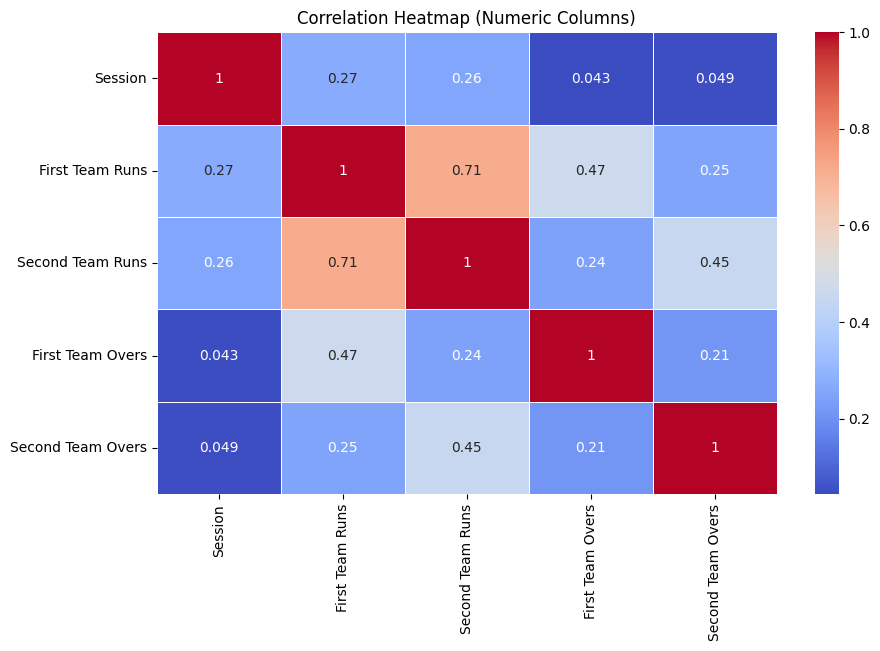

In [66]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_subset = df[numeric_columns]

# Create the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_subset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()

No correlation between session number and runs or overs.
Weak positive correlation (0.27) between runs of both teams: higher runs by one team slightly increases runs by the other.
Moderate positive correlation (0.71) between first team runs and overs: more runs, more overs.
Weak positive correlation (0.25) between first team runs and second team overs: higher runs lead to slightly more overs bowled by the opponent.
Moderate positive correlation (0.45) between second team runs and overs: more runs, more overs.
Weak positive correlation (0.21) between first and second team overs: slight tendency to bowl similar overs.

Match played each season 

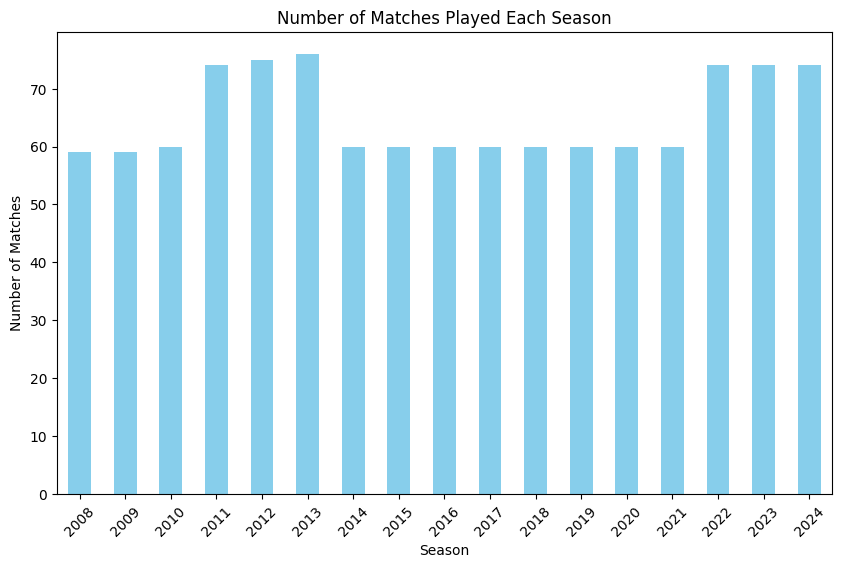

In [67]:


# Calculating  the number of matches played each season
matches_per_season = df['Session'].value_counts().sort_index()

# Plotting the number of matches played each season
plt.figure(figsize=(10, 6))  
matches_per_season.plot(kind='bar', color='skyblue')  
plt.title('Number of Matches Played Each Season') 
plt.xlabel('Season')  
plt.ylabel('Number of Matches')  
plt.xticks(rotation=45)  

plt.show()  


FREQUENCY OF MATCHES PLAYED AT EACH VENUE 

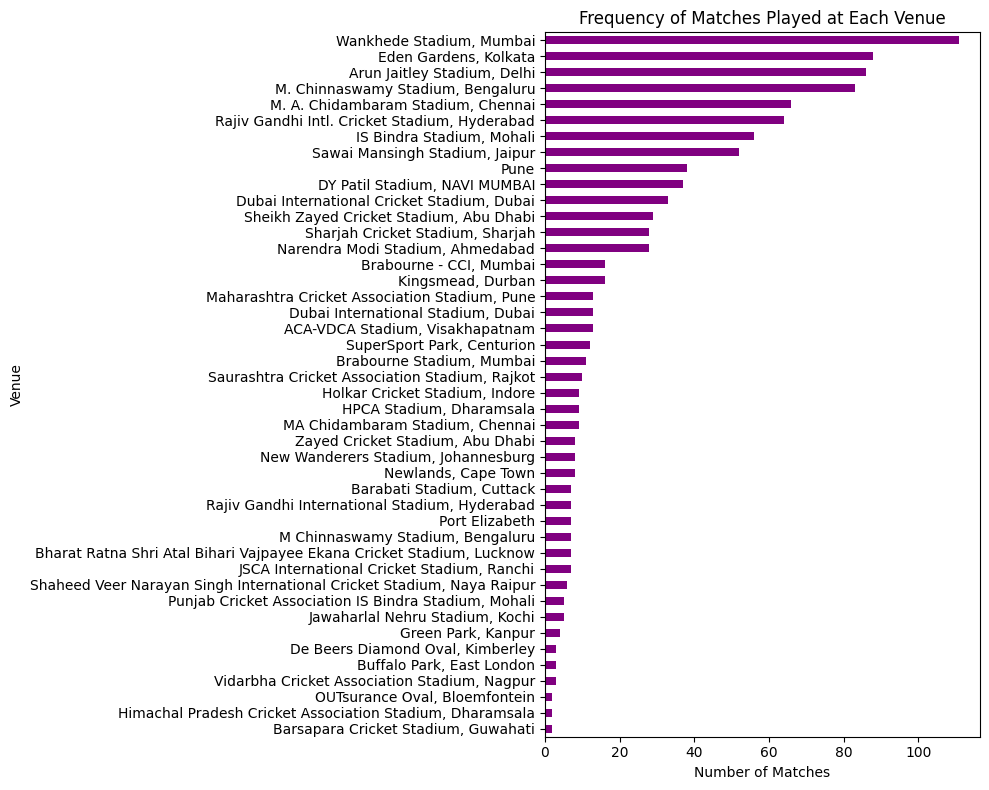

In [ ]:
venue_distribution = df['Venue'].value_counts()  # Calculating the frequency of matches played at each venue

plt.figure(figsize=(10, 8))  # size of the plot
venue_distribution.sort_values().plot(kind='barh', color='purple')  
plt.title('Frequency of Matches Played at Each Venue')  
plt.xlabel('Number of Matches') 
plt.ylabel('Venue')  
plt.tight_layout()  
plt.show()  


FREQUENCY OF WINS FOR EACH TEAM

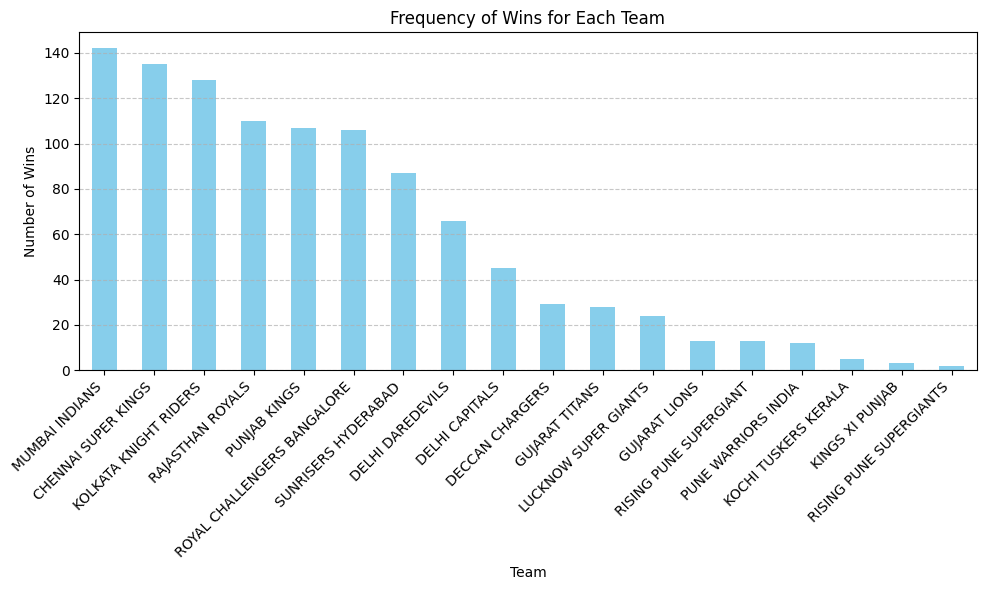

In [127]:


# Extract the winning team from the 'Winning Team' column
winning_teams = df['Winning Team'].str.split(' WON').str[0]

df['Winning Team']

df['Winning Team'].unique()

# Filter out rows where the winning team is a valid team name
valid_teams = ['RAJASTHAN ROYALS', 'CHENNAI SUPER KINGS', 'PUNJAB KINGS', 'MUMBAI INDIANS',
               'KOLKATA KNIGHT RIDERS', 'ROYAL CHALLENGERS BANGALORE', 'DELHI DAREDEVILS',
                'KINGS XI PUNJAB', 'DECCAN CHARGERS', 'SUNRISERS HYDERABAD',
               'KOCHI TUSKERS KERALA', 'PUNE WARRIORS INDIA', 'GUJARAT LIONS', 'RISING PUNE SUPERGIANT',
               'RISING PUNE SUPERGIANTS', 'DELHI CAPITALS', 'GUJARAT TITANS', 'LUCKNOW SUPER GIANTS']

winning_teams = winning_teams.loc[winning_teams.isin(valid_teams)]

# Calculate the frequency of wins for each team
win_counts = winning_teams.value_counts()


# Plot a bar chart to visualize the distribution of wins among different teams
plt.figure(figsize=(10, 6))
win_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Wins for Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


WINS BY TEAM OVER YEARS 

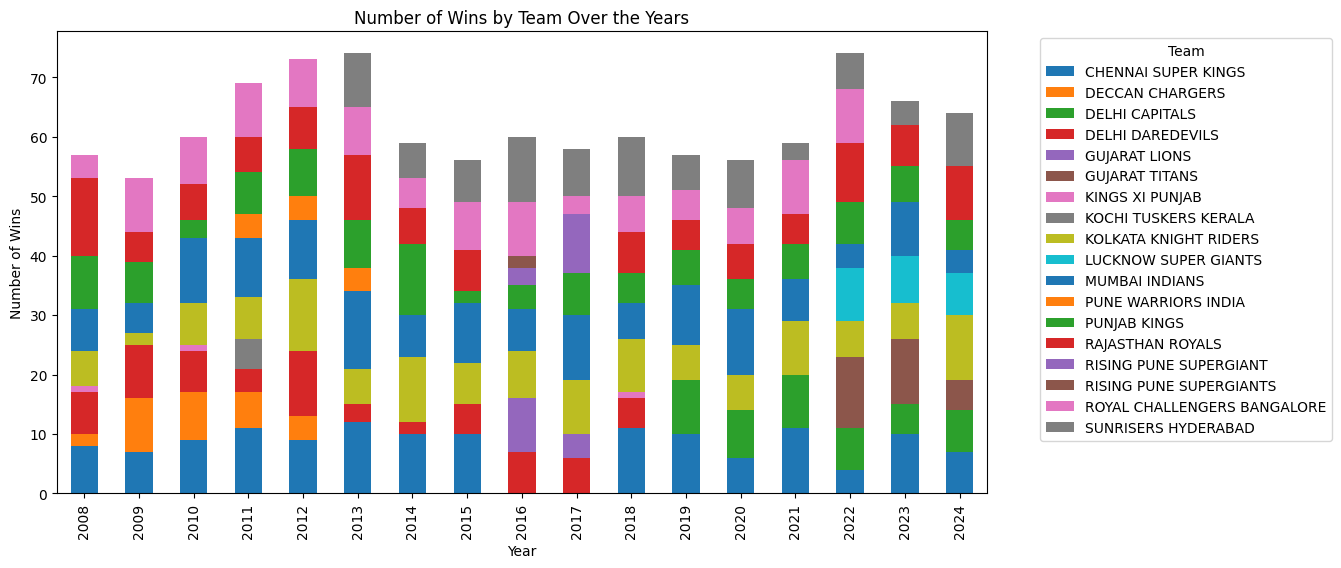

In [117]:

# Define the list of valid teams as there is incostintent data in winning team column
valid_teams = ['RAJASTHAN ROYALS', 'CHENNAI SUPER KINGS', 'PUNJAB KINGS', 'MUMBAI INDIANS',
               'KOLKATA KNIGHT RIDERS', 'ROYAL CHALLENGERS BANGALORE', 'DELHI DAREDEVILS',
               'KINGS XI PUNJAB', 'DECCAN CHARGERS', 'SUNRISERS HYDERABAD',
               'KOCHI TUSKERS KERALA', 'PUNE WARRIORS INDIA', 'GUJARAT LIONS', 'RISING PUNE SUPERGIANT',
               'RISING PUNE SUPERGIANTS', 'DELHI CAPITALS', 'GUJARAT TITANS', 'LUCKNOW SUPER GIANTS']

# Filter the dataset to include only rows with valid winning teams
df_valid = df[df['Winning Team'].isin(valid_teams)]

# Group the data by year and winning team, then count the number of wins for each team in each year
win_count = df_valid.groupby(['Session', 'Winning Team']).size().reset_index(name='Wins')

# Pivot the data to have years as index, teams as columns, and win count as values
win_count_pivot = win_count.pivot(index='Session', columns='Winning Team', values='Wins')

win_count_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Wins by Team Over the Years')  
plt.xlabel('Year')  
plt.ylabel('Number of Wins')  
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()  


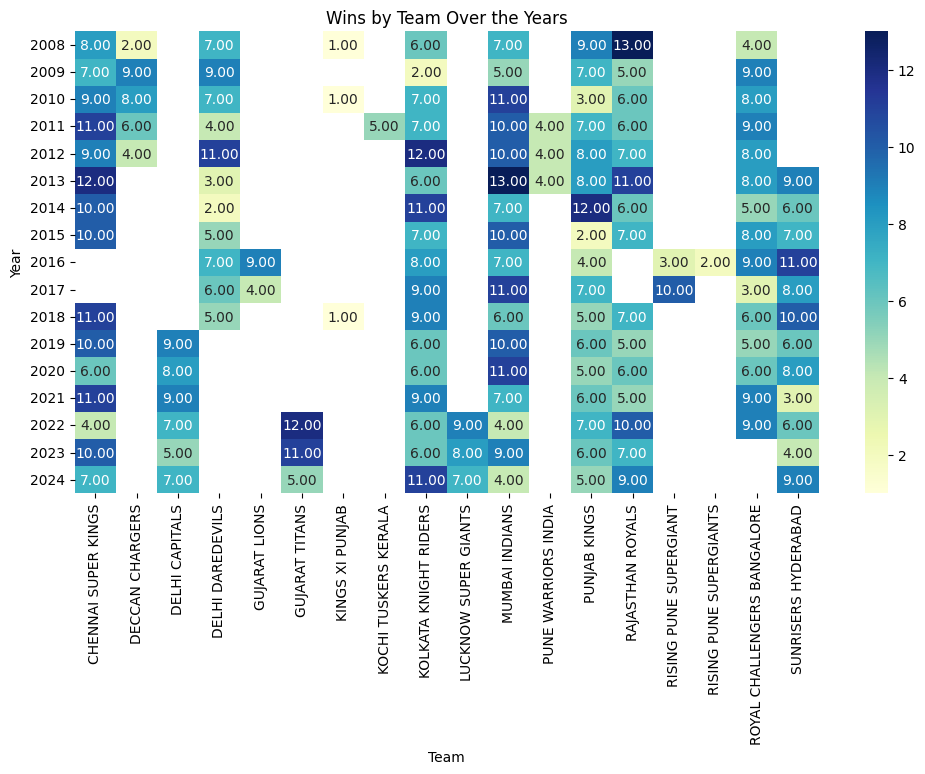

In [173]:
plt.figure(figsize=(12, 6))
sns.heatmap(win_count_pivot, cmap='YlGnBu', annot=True, fmt='.2f')  
plt.xlabel('Team')
plt.ylabel('Year')
plt.show()


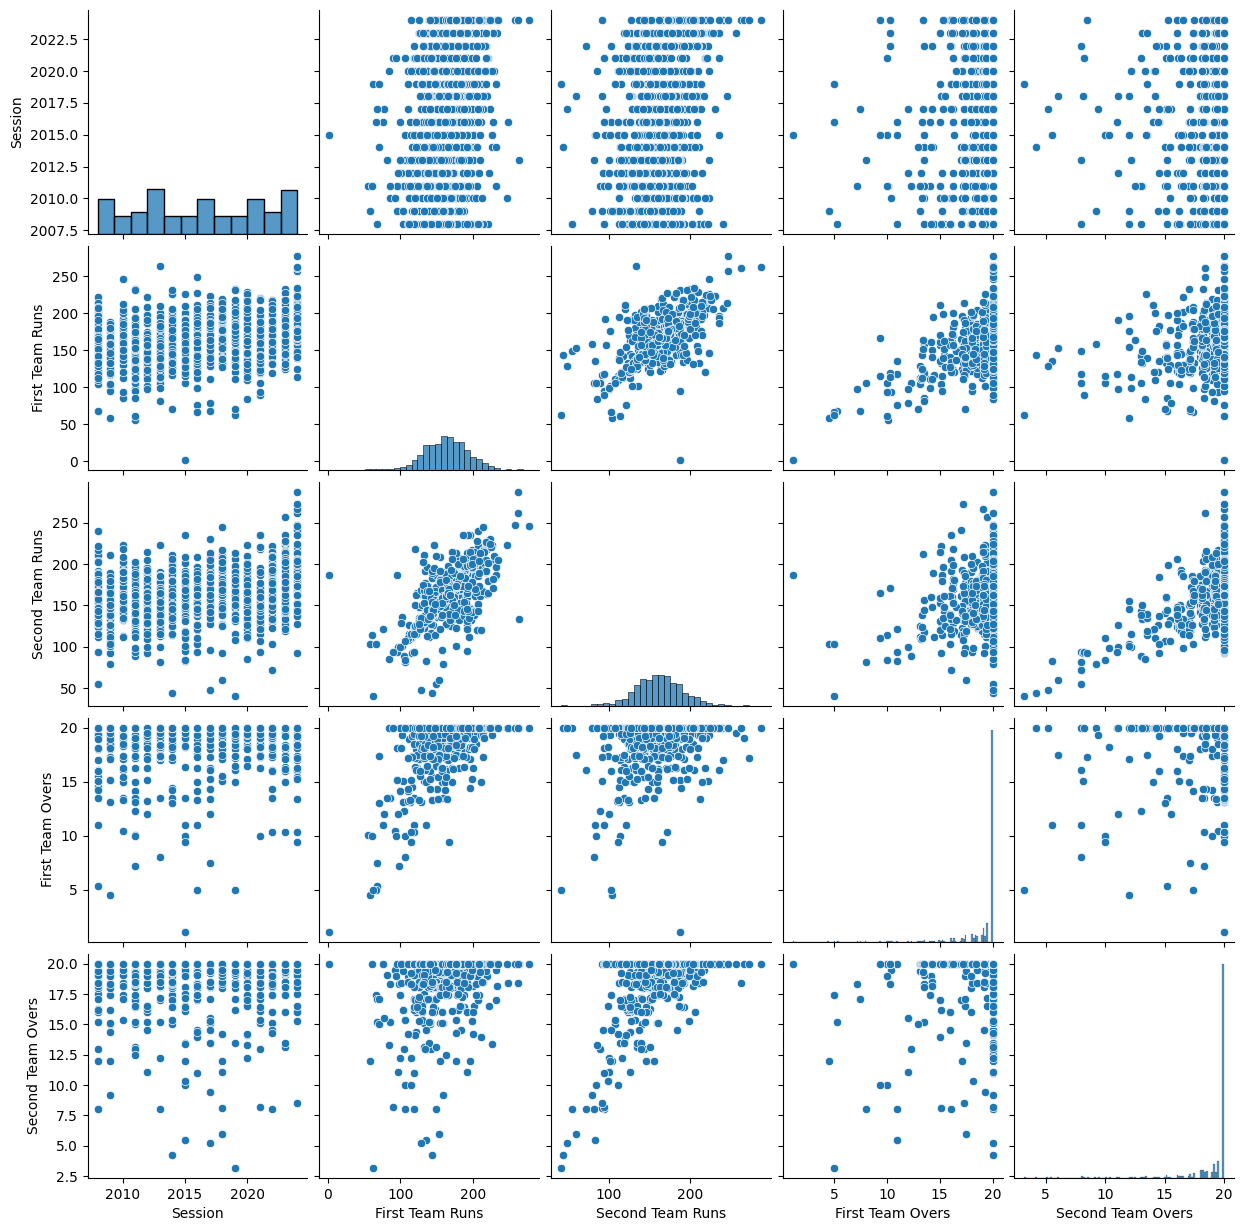

In [90]:
sns.pairplot(df)
plt.show()


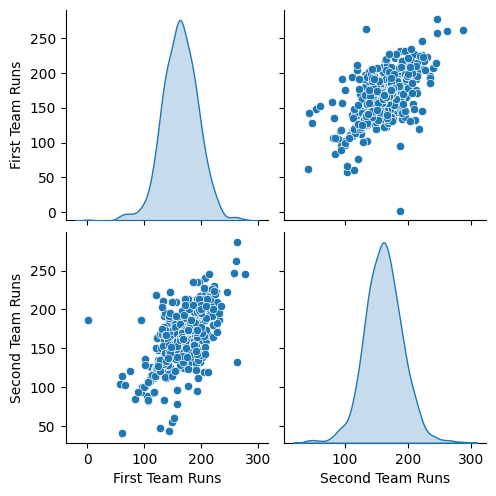

In [164]:
sns.pairplot(df[['First Team Runs', 'Second Team Runs', 'Winning Team Margin']], diag_kind='kde')
plt.show()

 Both teams' runs follow a normal distribution, showing consistent scoring.
Positive Correlation: Higher runs by one team correlate with higher runs by the other.
 Teams tend to perform similarly in terms of scoring.

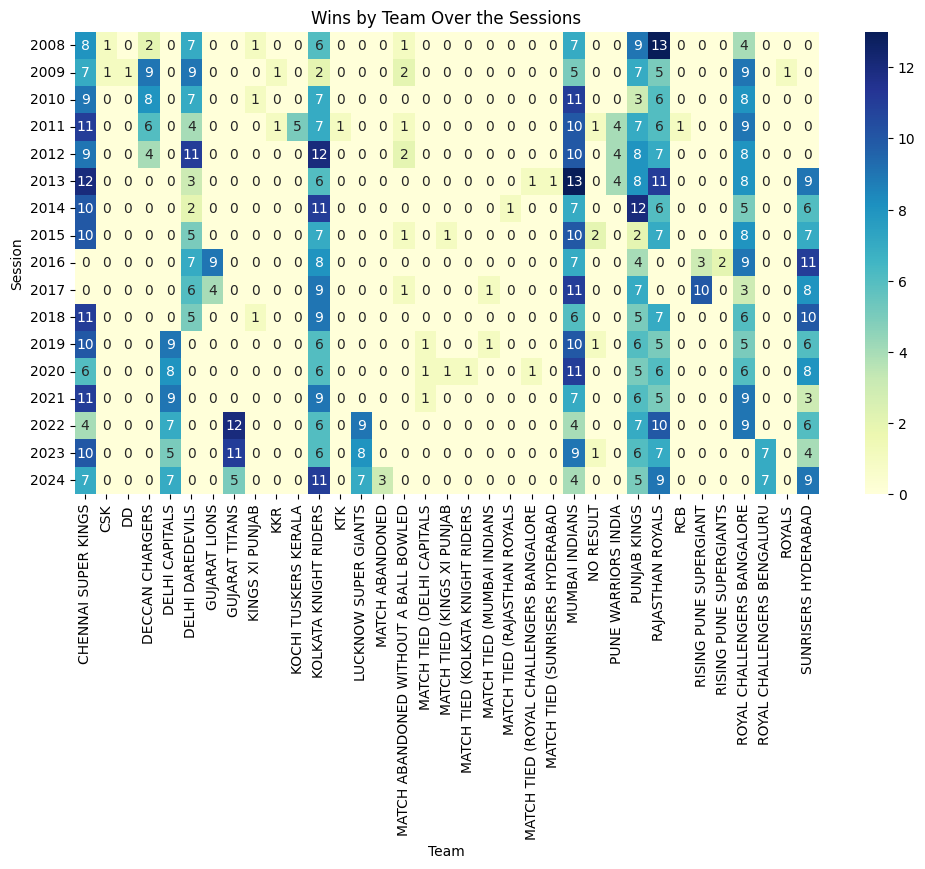

In [183]:
winning_teams_pivot = pd.pivot_table(df, index='Session', columns='Winning Team', aggfunc='size', fill_value=0)

# # Print the pivot table
# print(winning_teams_pivot)

plt.figure(figsize=(12, 6))
sns.heatmap(winning_teams_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Wins by Team Over the Sessions')
plt.xlabel('Team')
plt.ylabel('Session')
plt.show()

TOP 10 MATCH VENUES 

Top 10 venues for matches:
Venue
Wankhede Stadium, Mumbai                         118
Eden Gardens, Kolkata                             95
Arun Jaitley Stadium, Delhi                       91
M. Chinnaswamy Stadium, Bengaluru                 83
M. A. Chidambaram Stadium, Chennai                66
Rajiv Gandhi Intl. Cricket Stadium, Hyderabad     64
Sawai Mansingh Stadium, Jaipur                    57
IS Bindra Stadium, Mohali                         56
Pune                                              38
Narendra Modi Stadium, Ahmedabad                  37
Name: count, dtype: int64


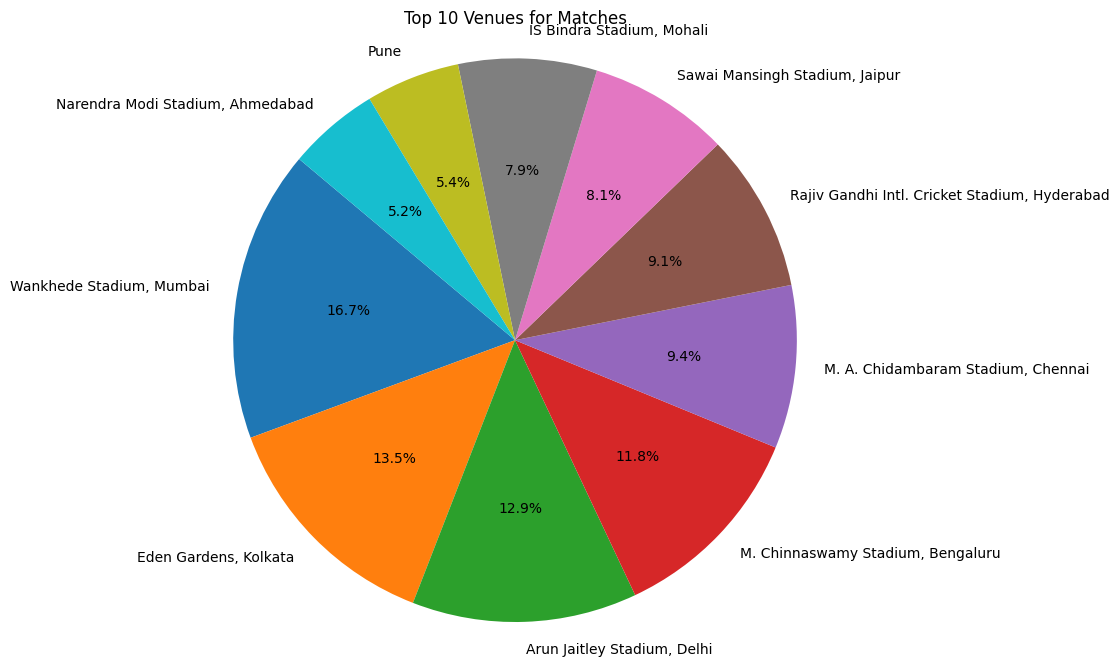

In [189]:
# Group the data by venue and count the number of matches at each venue
venue_counts = df['Venue'].value_counts()

# Select the top 10 venues
top_10_venues = venue_counts.head(10)

# Print the top 10 venues
print("Top 10 venues for matches:")
print(top_10_venues)

plt.figure(figsize=(8, 8))
plt.pie(top_10_venues, labels=top_10_venues.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Venues for Matches')
plt.axis('equal')  
plt.show()

WINING TEAM EACH SEASON

Session 2008: Winning Team - RAJASTHAN ROYALS
Session 2009: Winning Team - DECCAN CHARGERS
Session 2010: Winning Team - CHENNAI SUPER KINGS
Session 2011: Winning Team - CHENNAI SUPER KINGS
Session 2012: Winning Team - KOLKATA KNIGHT RIDERS
Session 2013: Winning Team - MUMBAI INDIANS
Session 2014: Winning Team - KOLKATA KNIGHT RIDERS
Session 2015: Winning Team - MUMBAI INDIANS
Session 2016: Winning Team - SUNRISERS HYDERABAD
Session 2017: Winning Team - MUMBAI INDIANS
Session 2018: Winning Team - CHENNAI SUPER KINGS
Session 2019: Winning Team - MUMBAI INDIANS
Session 2020: Winning Team - MUMBAI INDIANS
Session 2021: Winning Team - CHENNAI SUPER KINGS
Session 2022: Winning Team - GUJARAT TITANS
Session 2023: Winning Team - CHENNAI SUPER KINGS
Session 2024: Winning Team - KOLKATA KNIGHT RIDERS


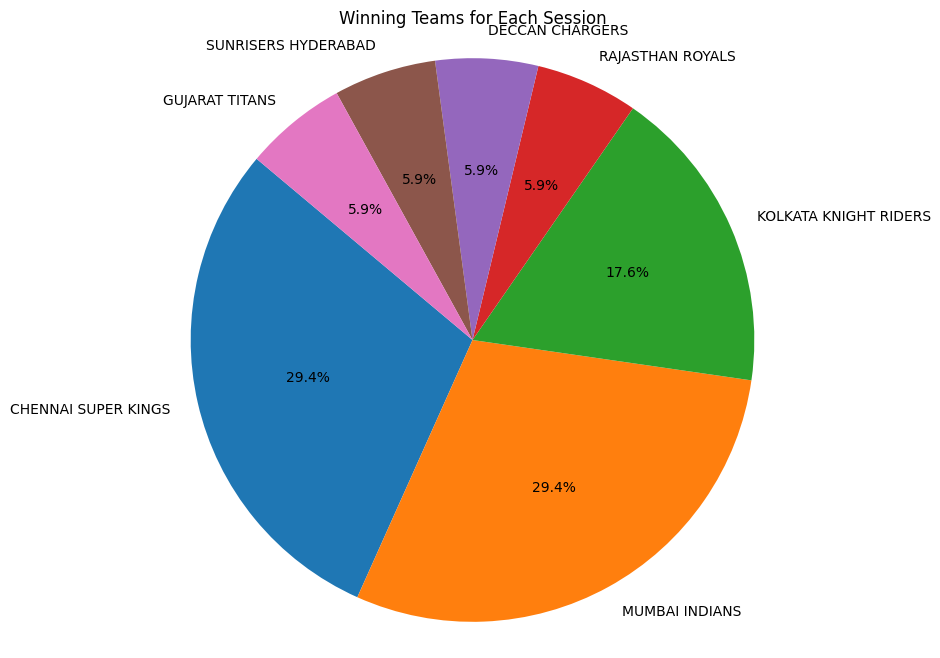

In [195]:
session_first_entries = df.groupby('Session').first()

# Extract the winning team from the first entry of each season
session_winners = session_first_entries['Winning Team']

# Print the winning team for each session
for session, winner in session_winners.items():
    print(f"Session {session}: Winning Team - {winner}")

winners_counts = session_winners.value_counts()


plt.figure(figsize=(8, 8))
plt.pie(winners_counts, labels=winners_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Winning Teams for Each Session')
plt.axis('equal')  
plt.show()

Mumbai Indians: 5 titles (2013, 2015, 2017, 2019, 2020)
Chennai Super Kings: 5 titles (2010, 2011, 2018, 2021,2023)
Kolkata Knight Riders: 3 titles (2012, 2014, 2024)
Sunrisers Hyderabad: 1 title (2016)
Rajasthan Royals: 1 title (2008)
Deccan Chargers: 1 title (2009)
Gujarat Titans: 1 title (2022)

In [209]:
# Extract full team names from the 'First Team' column
df['First Team'] = df['First Team'].str.extract(r'(.+?)\d')

# Extract full team names from the 'Second Team' column
df['Second Team'] = df['Second Team'].str.extract(r'(.+?)\d')

# Display the DataFrame after extracting full team names
df.head()

,Session,Match Number,Venue,Date and Time,Winning Team,First Team,Second Team,Link,First Team Runs,Second Team Runs,First Team Overs,Second Team Overs,Winning Team Margin
0,2008,59,"DY Patil Stadium, NAVI MUMBAI","JUN, SUN 1 , 8:00 pm IST",RAJASTHAN ROYALS,Chennai Super Kings,Rajasthan Royals,https://www.iplt20.com/match/2008/10058,163.0,164.0,20.0,20.0,3 WICKETS
1,2008,58,"Wankhede Stadium, Mumbai","MAY, SAT 31 , 8:00 pm IST",CHENNAI SUPER KINGS,Chennai Super Kings,Punjab Kings,https://www.iplt20.com/match/2008/10057,116.0,112.0,14.5,20.0,9 WICKETS
2,2008,57,"Wankhede Stadium, Mumbai","MAY, FRI 30 , 8:00 pm IST",RAJASTHAN ROYALS,Delhi Daredevils,Rajasthan Royals,https://www.iplt20.com/match/2008/10056,NaN,192.0,16.1,20.0,105 RUNS
3,2008,56,"IS Bindra Stadium, Mohali","MAY, WED 28 , 8:00 pm IST",PUNJAB KINGS,Punjab Kings,Rajasthan Royals,https://www.iplt20.com/match/2008/10055,221.0,180.0,20.0,20.0,41 RUNS
4,2008,55,"M. Chinnaswamy Stadium, Bengaluru","MAY, WED 28 , 4:00 pm IST",MUMBAI INDIANS,Royal Challengers Bangalore,Mumbai Indians,https://www.iplt20.com/match/2008/10054,122.0,126.0,18.0,16.0,9 WICKETS


In [234]:
first_matches = []

# Iterate over each session
for session, group in df.groupby('Session'):
    # Get the first match of the session
    first_match = group.iloc[0]
    
    # Extract winning team, first team, and last team
    winning_team = first_match['Winning Team']
    first_team = first_match['First Team']
    last_team = first_match['Second Team']
    
    # Append to the list of first matches
    first_matches.append([session, winning_team, first_team, last_team])

# Convert the list of first matches to a DataFrame
first_matches_df = pd.DataFrame(first_matches, columns=['Session', 'Winning Team', 'First Team', 'Last Team'])

print(first_matches_df)




    Session           Winning Team                    First Team  \
0      2008       RAJASTHAN ROYALS          Chennai Super Kings    
1      2009        DECCAN CHARGERS  Royal Challengers Bangalore    
2      2010    CHENNAI SUPER KINGS          Chennai Super Kings    
3      2011    CHENNAI SUPER KINGS          Chennai Super Kings    
4      2012  KOLKATA KNIGHT RIDERS        Kolkata Knight Riders    
5      2013         MUMBAI INDIANS          Chennai Super Kings    
6      2014  KOLKATA KNIGHT RIDERS                 Punjab Kings    
7      2015         MUMBAI INDIANS               Mumbai Indians    
8      2016    SUNRISERS HYDERABAD  Royal Challengers Bangalore    
9      2017         MUMBAI INDIANS       Rising Pune Supergiant    
10     2018    CHENNAI SUPER KINGS          Chennai Super Kings    
11     2019         MUMBAI INDIANS               Mumbai Indians    
12     2020         MUMBAI INDIANS               Mumbai Indians    
13     2021    CHENNAI SUPER KINGS          Chen

In [241]:
# Create a function to extract the losing team
def extract_losing_team(row):
    # Convert team names to lowercase for case-insensitive comparison
    winning_team_lower = row['Winning Team'].lower()
    first_team_lower = row['First Team'].lower()
    last_team_lower = row['Last Team'].lower()
    
    # Check if the first team is not the winning team
    if first_team_lower != winning_team_lower:
        return row['First Team']
    # Check if the last team is not the winning team
    elif last_team_lower != winning_team_lower:
        return row['Last Team']
    # If neither the first nor the last team matches the winning team, return None
    else:
        return None

# Apply the function to the DataFrame to extract the losing team
first_matches_df['Losing Team'] = first_matches_df.apply(extract_losing_team, axis=1)

print(first_matches_df[['Session', 'Winning Team', 'Losing Team']])



    Session           Winning Team                   Losing Team
0      2008       RAJASTHAN ROYALS          Chennai Super Kings 
1      2009        DECCAN CHARGERS  Royal Challengers Bangalore 
2      2010    CHENNAI SUPER KINGS          Chennai Super Kings 
3      2011    CHENNAI SUPER KINGS          Chennai Super Kings 
4      2012  KOLKATA KNIGHT RIDERS        Kolkata Knight Riders 
5      2013         MUMBAI INDIANS          Chennai Super Kings 
6      2014  KOLKATA KNIGHT RIDERS                 Punjab Kings 
7      2015         MUMBAI INDIANS               Mumbai Indians 
8      2016    SUNRISERS HYDERABAD  Royal Challengers Bangalore 
9      2017         MUMBAI INDIANS       Rising Pune Supergiant 
10     2018    CHENNAI SUPER KINGS          Chennai Super Kings 
11     2019         MUMBAI INDIANS               Mumbai Indians 
12     2020         MUMBAI INDIANS               Mumbai Indians 
13     2021    CHENNAI SUPER KINGS          Chennai Super Kings 
14     2022         GUJAR

    Session           Winning Team                     Runner UP
0      2008       RAJASTHAN ROYALS          Chennai Super Kings 
1      2009        DECCAN CHARGERS  Royal Challengers Bangalore 
2      2010    CHENNAI SUPER KINGS               Mumbai Indians 
3      2011    CHENNAI SUPER KINGS  Royal Challengers Bangalore 
4      2012  KOLKATA KNIGHT RIDERS          Chennai Super Kings 
5      2013         MUMBAI INDIANS          Chennai Super Kings 
6      2014  KOLKATA KNIGHT RIDERS                 Punjab Kings 
7      2015         MUMBAI INDIANS          Chennai Super Kings 
8      2016    SUNRISERS HYDERABAD  Royal Challengers Bangalore 
9      2017         MUMBAI INDIANS       Rising Pune Supergiant 
10     2018    CHENNAI SUPER KINGS          Sunrisers Hyderabad 
11     2019         MUMBAI INDIANS          Chennai Super Kings 
12     2020         MUMBAI INDIANS               Delhi Capitals 
13     2021    CHENNAI SUPER KINGS        Kolkata Knight Riders 
14     2022         GUJAR

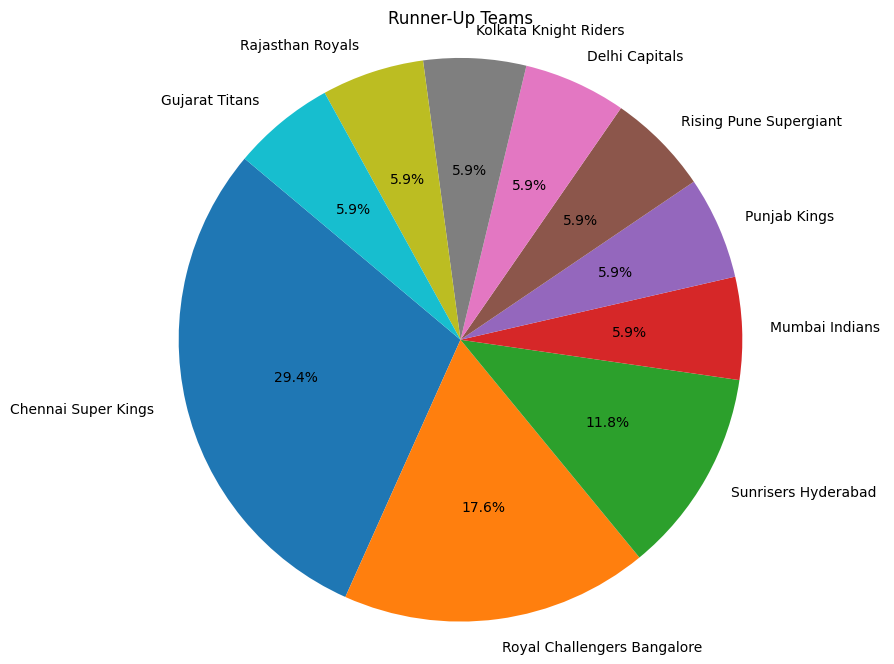

In [247]:

def extract_Runner_team(row):
    # Remove leading and trailing whitespace and convert team names to lowercase for case-insensitive comparison
    winning_team_lower = row['Winning Team'].strip().lower()
    first_team_lower = row['First Team'].strip().lower()
    last_team_lower = row['Last Team'].strip().lower()
    
    # Check if the first team is not the winning team
    if first_team_lower != winning_team_lower:
        return row['First Team']
    # Check if the last team is not the winning team
    elif last_team_lower != winning_team_lower:
        return row['Last Team']
    # If neither the first nor the last team matches the winning team, return None
    else:
        return None

# Apply the function to the DataFrame to extract the losing team
first_matches_df['Runner UP'] = first_matches_df.apply(extract_losing_team, axis=1)

print(first_matches_df[['Session', 'Winning Team', 'Runner UP']])

runner_up_counts = first_matches_df['Runner UP'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(runner_up_counts, labels=runner_up_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Runner-Up Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


CSK and MI show consistent runner-up performances, highlighting their sustained competitiveness.
Teams like RCB and KKR also feature prominently as strong contenders, indicating a diverse competitive landscape.



## Inferences and Conclusion

Let’s summarize the important observations made during Exploratory Data Analysis:
-- Mumbai Indians is the most successful team in IPL wining 142 matches 
-- Wankhede Stadium, Mumbai  has hosted the most number of IPL matches
-- Till 2024 , 46 venues have hosted 1105 IPL matches
-- Mumbai Indians has won 5  seasons and have been runner-ups for only one season.
-- Chennai Super kings has been runner-ups for 5 times and won 5 times.